# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | trincomalee
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | peace river
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | el granada
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | san rafael del sur
Processing Record 19 of Set 1 | tazacorte
Processing Record 20 of Set 1 | kyshtovka
Processing Record 21 of Set 1 | capitan bado
Processing Record 22 of Set 1 | avarua
P

Processing Record 41 of Set 4 | maxixe
Processing Record 42 of Set 4 | chikwawa
Processing Record 43 of Set 4 | dalandzadgad
Processing Record 44 of Set 4 | badger
Processing Record 45 of Set 4 | sao tome
Processing Record 46 of Set 4 | nuku'alofa
Processing Record 47 of Set 4 | smithers
Processing Record 48 of Set 4 | moose jaw
Processing Record 49 of Set 4 | barquisimeto
Processing Record 0 of Set 5 | hanak
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | hindoria
Processing Record 3 of Set 5 | kavieng
Processing Record 4 of Set 5 | itamaraca
Processing Record 5 of Set 5 | terekeka
City not found. Skipping...
Processing Record 6 of Set 5 | itoman
Processing Record 7 of Set 5 | richards bay
Processing Record 8 of Set 5 | bamboo flat
Processing Record 9 of Set 5 | port saint john's
Processing Record 10 of Set 5 | longyearbyen
Processing Record 11 of Set 5 | broome
Processing Record 12 of Set 5 | khonsa
Processing Record 13 of Set 5 | lihue
Processing Record 14 of

Processing Record 35 of Set 8 | kristiansund
Processing Record 36 of Set 8 | mandera
Processing Record 37 of Set 8 | relizane
Processing Record 38 of Set 8 | vargem grande
Processing Record 39 of Set 8 | xinguara
City not found. Skipping...
Processing Record 40 of Set 8 | swakopmund
Processing Record 41 of Set 8 | prince rupert
Processing Record 42 of Set 8 | vila franca do campo
Processing Record 43 of Set 8 | tangzhai
Processing Record 44 of Set 8 | evinayong
Processing Record 45 of Set 8 | mongagua
Processing Record 46 of Set 8 | reguiba
Processing Record 47 of Set 8 | thinadhoo
Processing Record 48 of Set 8 | coari
Processing Record 49 of Set 8 | omis
Processing Record 0 of Set 9 | atafu village
Processing Record 1 of Set 9 | san pedro pochutla
Processing Record 2 of Set 9 | twon-brass
Processing Record 3 of Set 9 | kupang
Processing Record 4 of Set 9 | altai
Processing Record 5 of Set 9 | alvarado
Processing Record 6 of Set 9 | vernal
Processing Record 7 of Set 9 | ostersund
Proce

Processing Record 24 of Set 12 | porto novo
Processing Record 25 of Set 12 | la foa
Processing Record 26 of Set 12 | luderitz
Processing Record 27 of Set 12 | simplicio mendes
Processing Record 28 of Set 12 | sao vicente
Processing Record 29 of Set 12 | linhares
Processing Record 30 of Set 12 | shangri-la
City not found. Skipping...
Processing Record 31 of Set 12 | nago
Processing Record 32 of Set 12 | meizhou
Processing Record 33 of Set 12 | hithadhoo
Processing Record 34 of Set 12 | aioun
Processing Record 35 of Set 12 | salem
Processing Record 36 of Set 12 | kolyshley
Processing Record 37 of Set 12 | tessaoua
Processing Record 38 of Set 12 | porto velho
Processing Record 39 of Set 12 | brisas de zicatela
Processing Record 40 of Set 12 | cova figueira
Processing Record 41 of Set 12 | dalian
Processing Record 42 of Set 12 | aginskoye
Processing Record 43 of Set 12 | sinjai
Processing Record 44 of Set 12 | estherville
Processing Record 45 of Set 12 | annandale
Processing Record 46 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          609
Lat           609
Lng           609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-0.46,86,92,7.49,GS,1694970049
1,katsuura,35.1333,140.3000,26.23,88,4,5.94,JP,1694970050
2,yellowknife,62.4560,-114.3525,13.56,88,99,5.36,CA,1694970050
3,port-aux-francais,-49.3500,70.2167,5.48,97,100,13.11,TF,1694970051
4,west island,-12.1568,96.8225,24.99,83,100,7.72,CC,1694970051


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-0.46,86,92,7.49,GS,1694970049
1,katsuura,35.1333,140.3000,26.23,88,4,5.94,JP,1694970050
2,yellowknife,62.4560,-114.3525,13.56,88,99,5.36,CA,1694970050
3,port-aux-francais,-49.3500,70.2167,5.48,97,100,13.11,TF,1694970051
4,west island,-12.1568,96.8225,24.99,83,100,7.72,CC,1694970051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

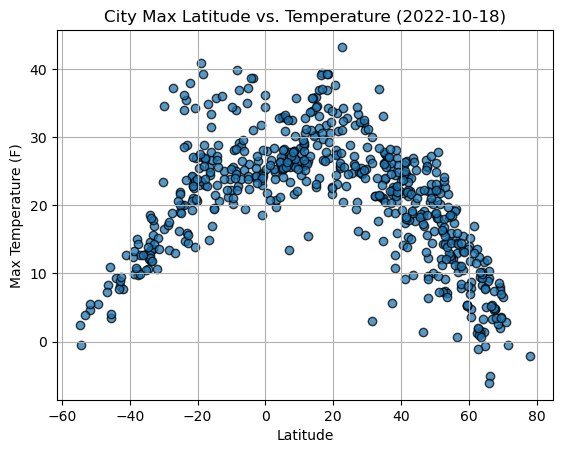

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

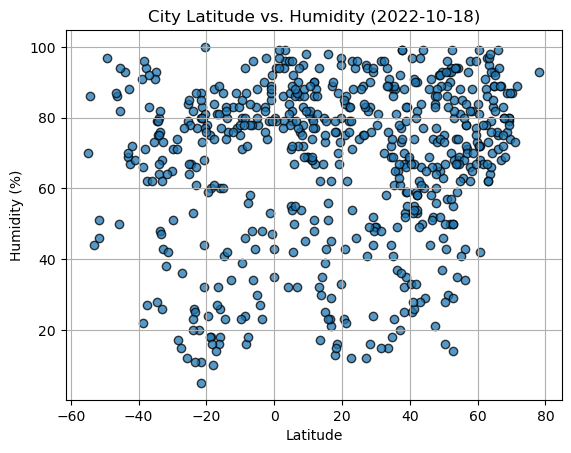

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

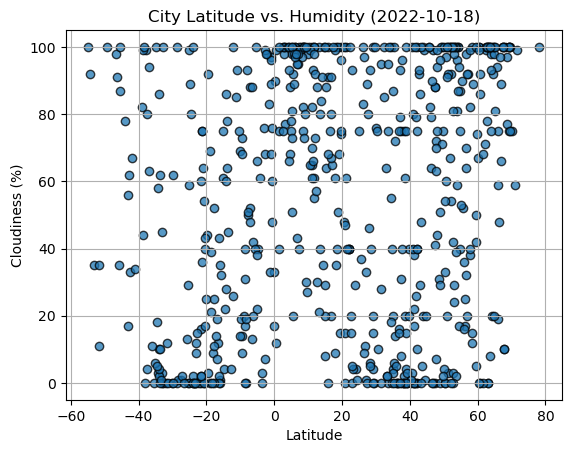

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

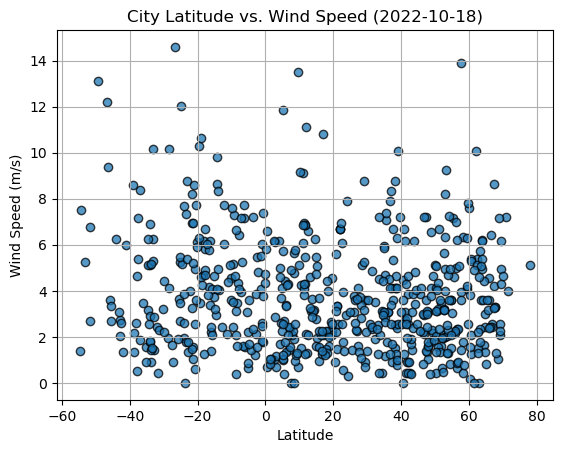

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,katsuura,35.1333,140.3000,26.23,88,4,5.94,JP,1694970050
2,yellowknife,62.4560,-114.3525,13.56,88,99,5.36,CA,1694970050
6,trincomalee,8.5711,81.2335,28.04,72,100,5.64,LK,1694969757
7,tiksi,71.6872,128.8694,-0.54,89,99,4.00,RU,1694970051
8,peace river,56.2501,-117.2860,19.52,34,25,4.98,CA,1694970052


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-0.46,86,92,7.49,GS,1694970049
3,port-aux-francais,-49.3500,70.2167,5.48,97,100,13.11,TF,1694970051
4,west island,-12.1568,96.8225,24.99,83,100,7.72,CC,1694970051
5,alice springs,-23.7000,133.8833,14.75,26,0,0.00,AU,1694969919
10,puerto natales,-51.7236,-72.4875,4.58,51,11,2.67,CL,1694970053


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7765992000193316


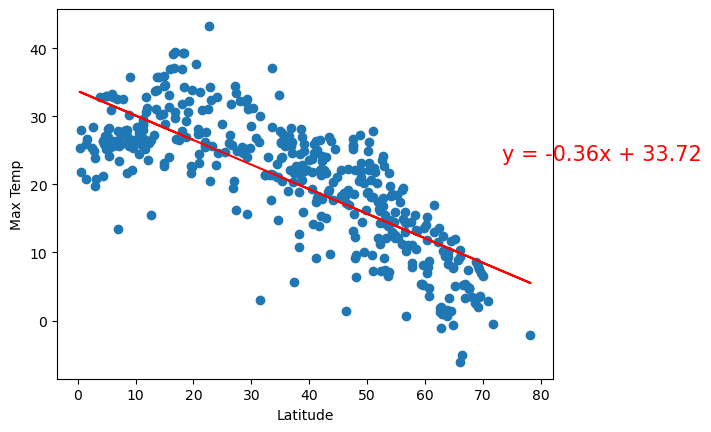

In [15]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = slope * northern_hemi_df["Lat"] + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {r_value}")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(formula, (northern_hemi_df["Lat"].max() - 5, regress_values.max() - 10), fontsize=15, color="red")


plt.show()

The r-value is: 0.7560045693869165


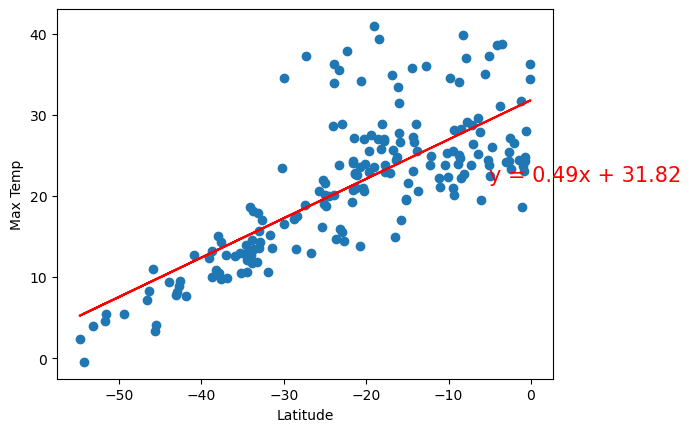

In [16]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = slope * southern_hemi_df["Lat"] + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {r_value}")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(formula, (southern_hemi_df["Lat"].max() - 5, regress_values.max() - 10), fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:** We observe a positive correlation between the maximum temperature and the latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06237851150149853


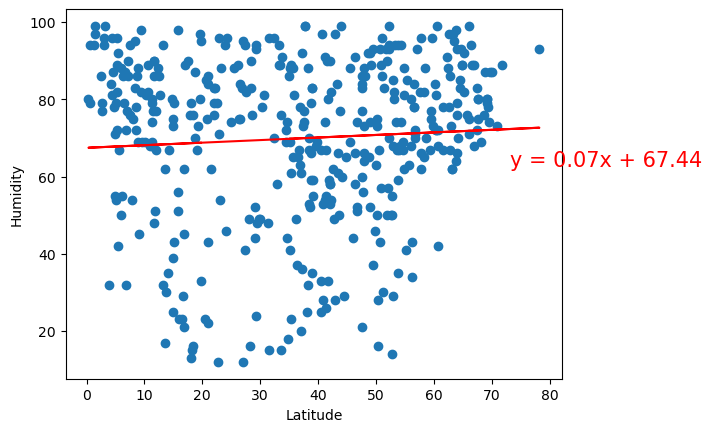

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = slope * northern_hemi_df["Lat"] + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {r_value}")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(formula, (northern_hemi_df["Lat"].max() - 5, regress_values.max() - 10), fontsize=15, color="red")

plt.show()

The r-value is: -0.04646823922324631


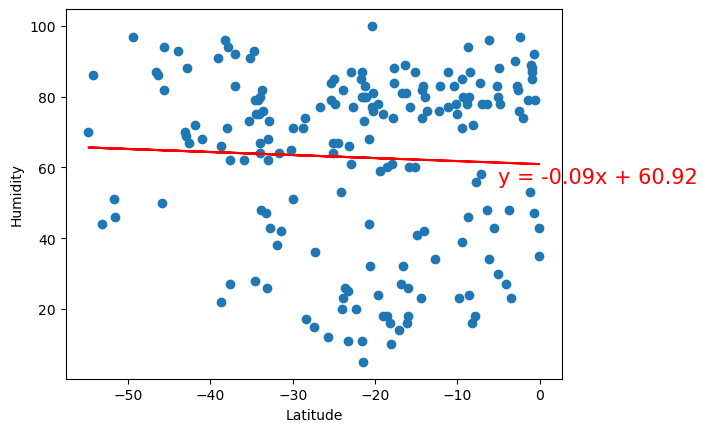

In [18]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = slope * southern_hemi_df["Lat"] + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {r_value}")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(formula, (southern_hemi_df["Lat"].max() -5, regress_values.max() - 10), fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:** We do not observe any clear correlation between the humidity and the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.05942154332754894


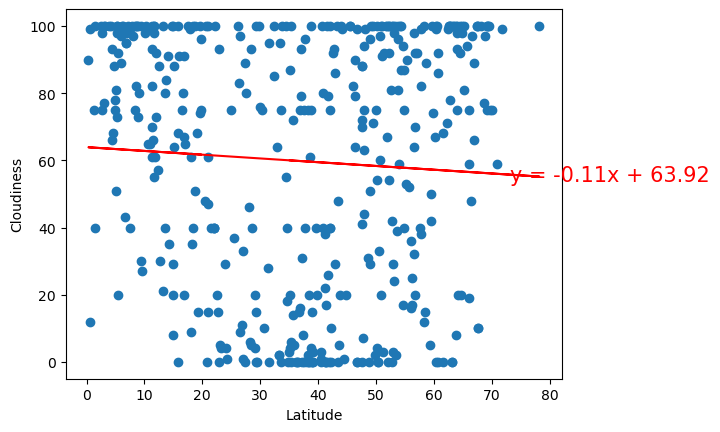

In [19]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = slope * northern_hemi_df["Lat"] + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {r_value}")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(formula, (northern_hemi_df["Lat"].max() - 5, regress_values.max() - 10), fontsize=15, color="red")

plt.show()

The r-value is: 0.01365284341023249


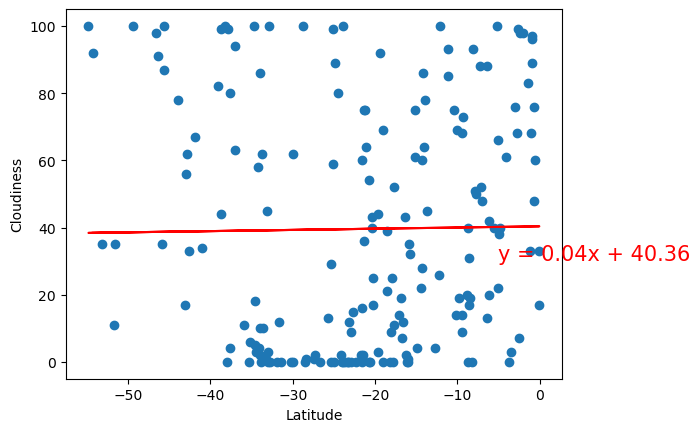

In [20]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = slope * southern_hemi_df["Lat"] + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {r_value}")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(formula, (southern_hemi_df["Lat"].max() - 5, regress_values.max() - 10), fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:** We do not observe any clear correlation between the cloudiness and the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.025456024033671823


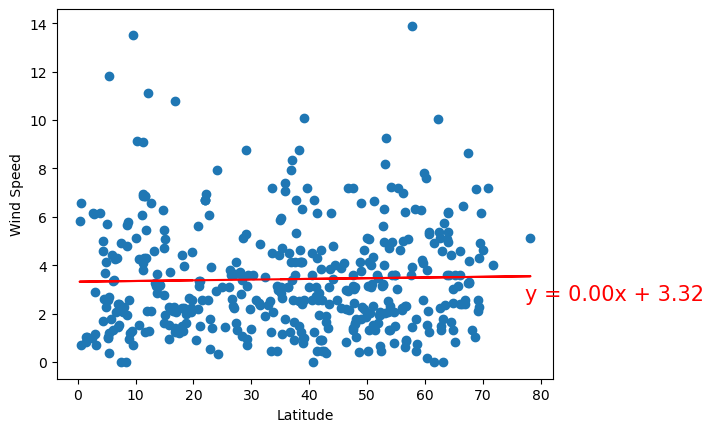

In [21]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = slope * northern_hemi_df["Lat"] + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {r_value}")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(formula, (northern_hemi_df["Lat"].max() - 1, regress_values.max() - 1), fontsize=15, color="red")

plt.show()

The r-value is: -0.06866591337664005


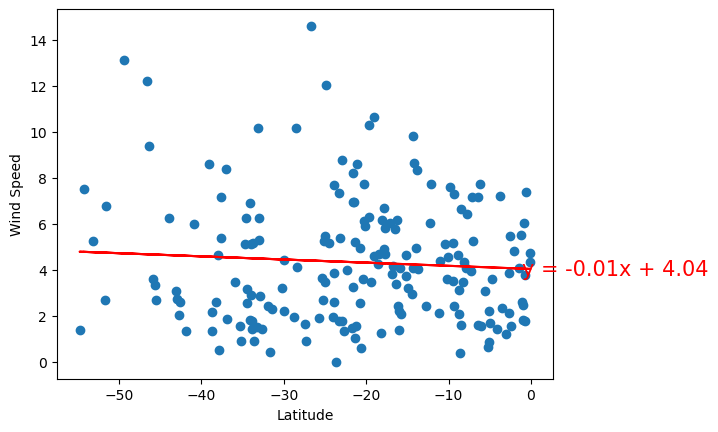

In [22]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = slope * southern_hemi_df["Lat"] + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {r_value}")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(formula, (southern_hemi_df["Lat"].max() - 1, regress_values.max() - 1), fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:** We do not observe any clear correlation between the wind speed and the latitude.